In [1]:
import transformers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn

# model_name = 'FacebookAI/xlm-roberta-base'
model_name = 'distilbert/distilbert-base-multilingual-cased'
model_file = 'model_distilmbert.keras'
train_data = pd.read_csv("train.csv", encoding='latin-1')
val_data = pd.read_csv("val.csv", encoding='latin-1')
test_data = pd.read_csv("test.csv", encoding='latin-1')

def tupleize(data, max_length=512):
    data['safe'] = data['safe'].astype(int)
    tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
    
    tokens = tokenizer(list(data["prompt"]), return_tensors="np", padding=True, truncation=True, max_length=max_length)
    
    token_lengths = [len(token) for token in tokens['input_ids']]
    data_filtered = data.iloc[np.where(np.array(token_lengths) <= max_length)]
    
    tokens = tokenizer(list(data_filtered["prompt"]), return_tensors="np", padding=True, truncation=True, max_length=max_length)
    
    labels = np.array(data_filtered["safe"])
    
    return (tokens, labels)

train_data = tupleize(train_data)
val_data = tupleize(val_data)
test_data = tupleize(test_data)

/Users/amielchristianmala-ay/Documents/Projects/nlp-project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


(array([688.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 840.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

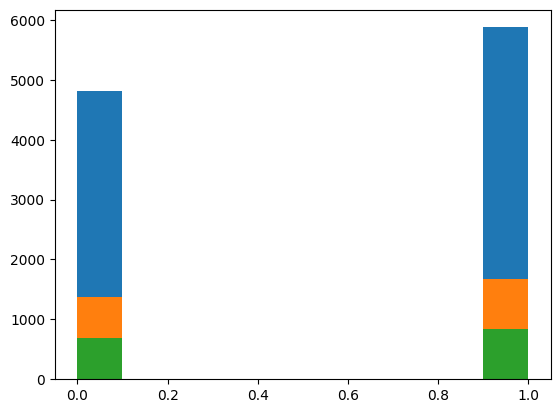

In [2]:
import matplotlib.pyplot as plt

plt.hist(train_data[1])
plt.hist(val_data[1])
plt.hist(test_data[1])

In [7]:
import transformers
import tensorflow as tf
import datasets

model = tf.keras.models.load_model(model_file)
model.compile(optimizer=transformers.AdamWeightDecay(learning_rate=3e-5), metrics=['accuracy'])  # No loss argument!
# model.fit(x=train_data[0], y=train_data[1], validation_data=(val_data[0], val_data[1]), batch_size=8, epochs=5)

ImportError: cannot import name 'TFGenerationMixin' from 'transformers.generation' (/Users/amielchristianmala-ay/Documents/Projects/nlp-project/.venv/lib/python3.12/site-packages/transformers/generation/__init__.py)

In [ ]:
model.evaluate(test_data[0], test_data[1])

In [ ]:
model.save('model_ttv.keras')

In [ ]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model.predict(tokenizer("Pano magluto ng sinigang?", return_tensors="np"))